## **Importing Necessary Libraries**

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [231]:
# Loading The Dataset
df=pd.read_csv('/content/train_and_test2.csv')

In [232]:
# Printing Top few lines
df.head(10)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
5,6,28.0,8.4583,0,0,0,0,0,0,0,...,0,0,0,3,0,0,1.0,0,0,0
6,7,54.0,51.8625,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,0
7,8,2.0,21.0750,0,3,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
8,9,27.0,11.1333,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
9,10,14.0,30.0708,1,1,0,0,0,0,0,...,0,0,0,2,0,0,0.0,0,0,1


### **Data Cleaning & Preprocessing**

In [233]:
# Checking the shape of the dataset
df.shape

(1309, 28)

In [234]:
# Checking Missing/null values
df.isna().sum()

,0
Passengerid,0
Age,0
Fare,0
Sex,0
sibsp,0
zero,0
zero.1,0
zero.2,0
zero.3,0
zero.4,0


In [235]:
# Columns Renaming
df.rename(columns={"2urvived": "Survived"}, inplace=True)

In [236]:
# Handling missing/null values
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [237]:
# Dropping Unwanted Columns
df.drop(columns=['zero','zero.1','zero.2','zero.3','zero.4','zero.5','zero.6','zero.7','zero.8','zero.9','zero.10','zero.11','zero.12','zero.13','zero.14','zero.15','zero.16','zero.17','zero.18'],inplace=True)

In [238]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [239]:
# Checking Duplicates
df.duplicated().sum()

0

In [240]:
# Standardization
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
df[['Age','Fare']]=Scaler.fit_transform(df[['Age','Fare']])

In [241]:
# Printing few rows from bottom
df.tail()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
1304,1305,-0.116523,-0.487824,0,0,0,3,2.0,0
1305,1306,0.736169,1.462034,1,0,0,1,0.0,0
1306,1307,0.697411,-0.503291,0,0,0,3,2.0,0
1307,1308,-0.116523,-0.487824,0,0,0,3,2.0,0
1308,1309,-0.116523,-0.211184,0,1,1,3,0.0,0


In [242]:
# Statistical summary for the dataset
df.describe()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
count,1309.000000,1.309000e+03,1.309000e+03,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,3.358658e-17,-2.442660e-17,0.355997,0.498854,0.385027,2.294882,1.493506,0.261268
std,378.020061,1.000382e+00,1.000382e+00,0.478997,1.041658,0.865560,0.837836,0.814244,0.439494
min,1.000000,-2.273836e+00,-6.434642e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,328.000000,-5.816283e-01,-4.908050e-01,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,655.000000,-1.165232e-01,-3.640034e-01,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,982.000000,4.260994e-01,-3.878613e-02,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,1309.000000,3.914388e+00,9.262028e+00,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


In [243]:
# Summary for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Embarked     1309 non-null   float64
 8   Survived     1309 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.2 KB


In [244]:
# Feature Enginering
df['Family']=df['sibsp']+df['Parch']+1
df.drop(columns=['sibsp','Parch'],inplace=True)

In [245]:
df.head()

,Passengerid,Age,Fare,Sex,Pclass,Embarked,Survived,Family
0,1,-0.581628,-0.503291,0,3,2.0,0,2
1,2,0.658652,0.734744,1,1,0.0,1,2
2,3,-0.271558,-0.490240,1,3,2.0,1,1
3,4,0.426099,0.383183,1,1,2.0,1,2
4,5,0.426099,-0.487824,0,3,2.0,0,1


### **Data Visualization (EDA)**

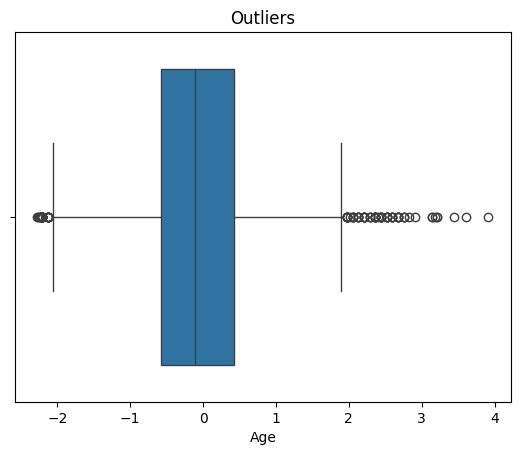

In [246]:
# Checking outliers
sns.boxplot(df['Age'],orient='h')
plt.title('Outliers')
plt.show()

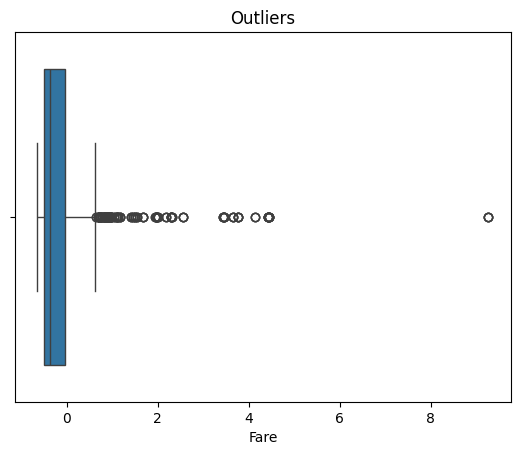

In [247]:
sns.boxplot(df['Fare'],orient='h')
plt.title('Outliers')
plt.show()

In [248]:
# Removing Outliers
df['Age']=np.log1p(df['Age'])

In [249]:
df['Fare']=np.log1p(df['Fare'])

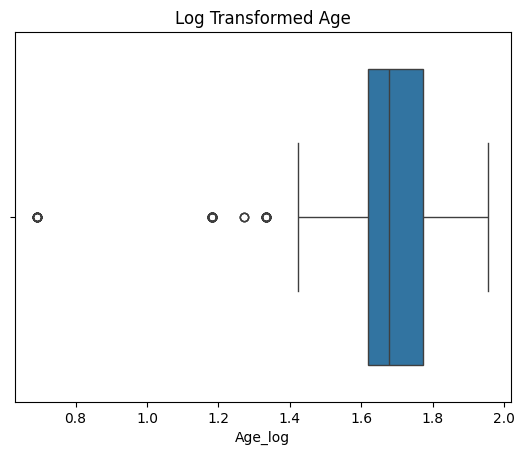

In [250]:
if (df['Age'] < 0).any():
    df['Age_log'] = np.log1p(df['Age'] - df['Age'].min() + 1)
else:
    df['Age_log'] = np.log1p(df['Age'])

# Boxplot after transformation
sns.boxplot(df['Age_log'], orient='h')
plt.title('Log Transformed Age')
plt.show()

In [251]:
df.head()

,Passengerid,Age,Fare,Sex,Pclass,Embarked,Survived,Family,Age_log
0,1,-0.871385,-0.699751,0,3,2.0,0,2,1.528092
1,2,0.506005,0.550860,1,1,0.0,1,2,1.789551
2,3,-0.316848,-0.673816,1,3,2.0,1,1,1.641694
3,4,0.354943,0.324388,1,1,2.0,1,2,1.763994
4,5,0.354943,-0.669086,0,3,2.0,0,1,1.763994


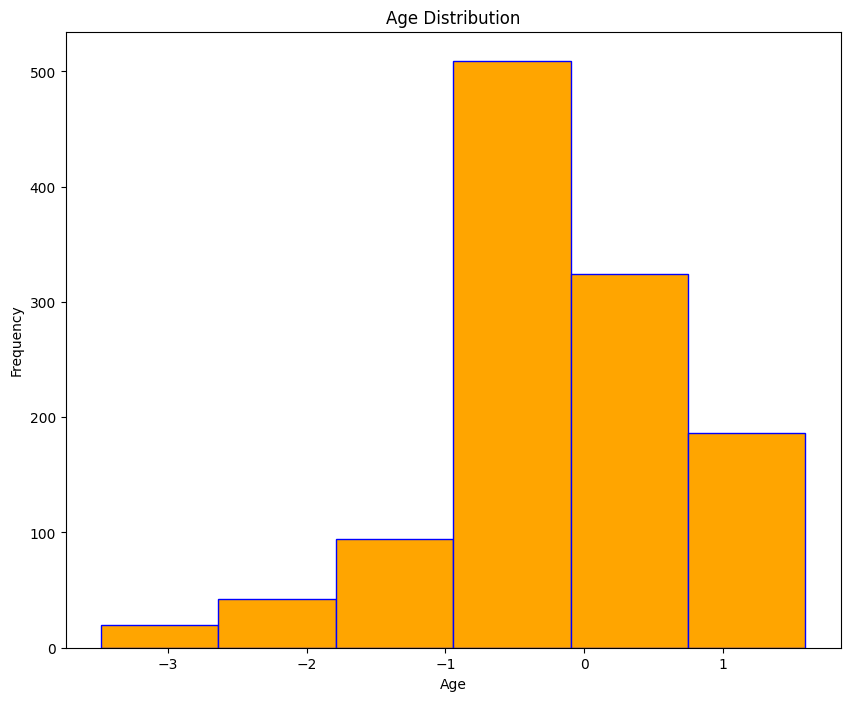

In [252]:
# Plotting Histogram
plt.figure(figsize=(10,8))
plt.hist(df['Age'],bins=6,color='Orange',edgecolor='Blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

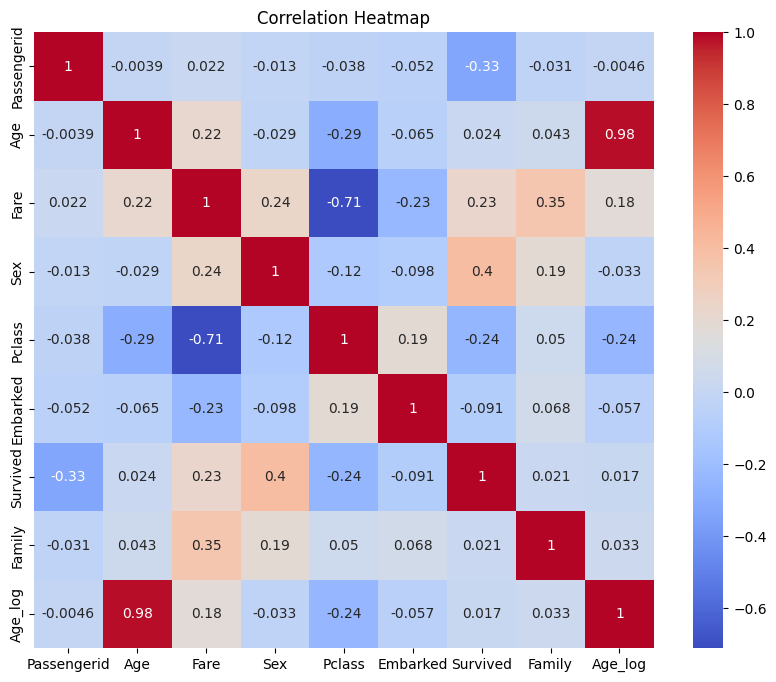

In [253]:
# Correlation heatmap
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

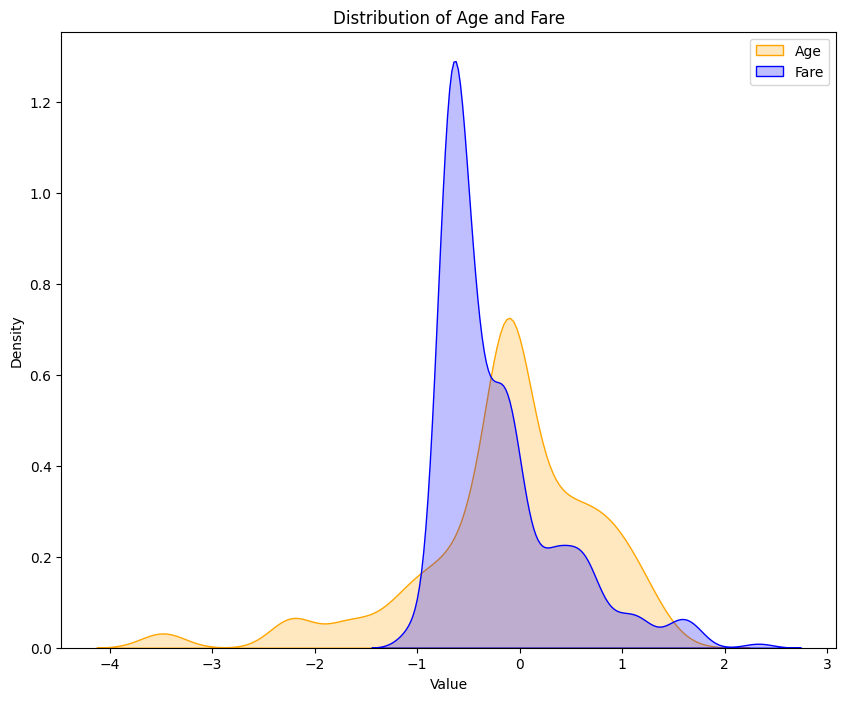

In [254]:
# Distribution of Age and Fare
plt.figure(figsize=(10,8))
sns.kdeplot(df['Age'],shade=True,color='Orange',label='Age')
sns.kdeplot(df['Fare'],shade=True,color='Blue',label='Fare')
plt.title('Distribution of Age and Fare')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

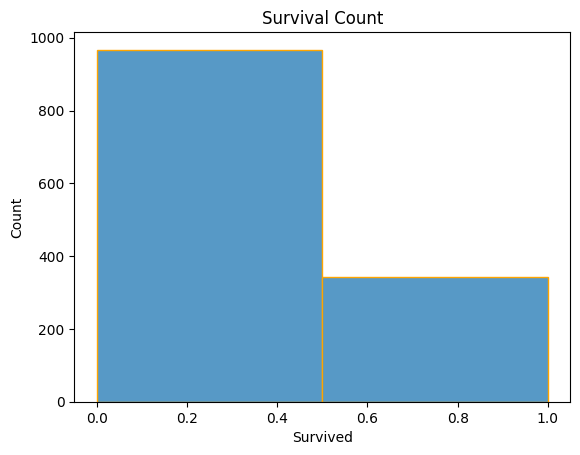

In [255]:
# Histogram plot
sns.histplot(df["Survived"], bins=2, kde=False,edgecolor='orange')
plt.title("Survival Count")
plt.show()

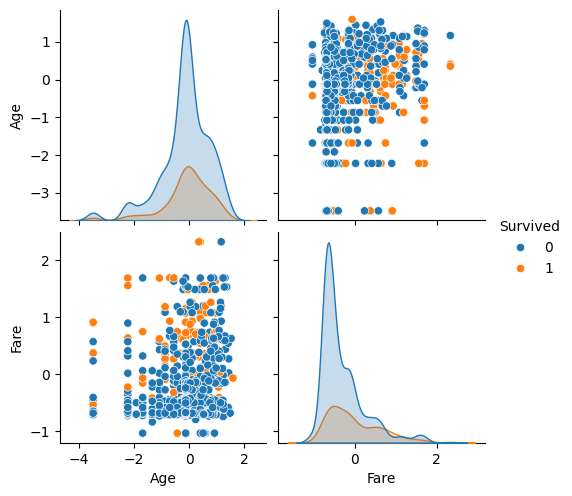

In [256]:
# Feature Relationship
sns.pairplot(df[["Age", "Fare", "Survived"]], hue="Survived")
plt.show()

In [257]:
# Features X & y
X=df.drop(columns=['Survived'])
y=df['Survived']

In [258]:
print(X.isnull().sum())

Passengerid      0
Age            134
Fare             0
Sex              0
Pclass           0
Embarked         0
Family           0
Age_log        134
dtype: int64


In [259]:
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Age_log'].fillna(X['Age_log'].median(), inplace=True)

In [260]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

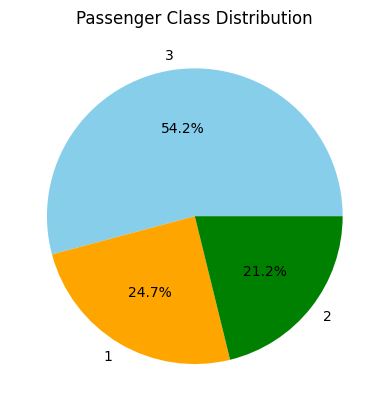

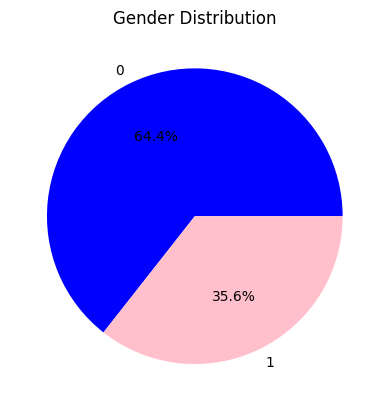

In [261]:
# Passenger Class Distribution (Pclass)
df["Pclass"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "orange", "green"])
plt.title("Passenger Class Distribution")
plt.ylabel("")
plt.show()

# Gender Distribution
df["Sex"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["blue", "pink"])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()


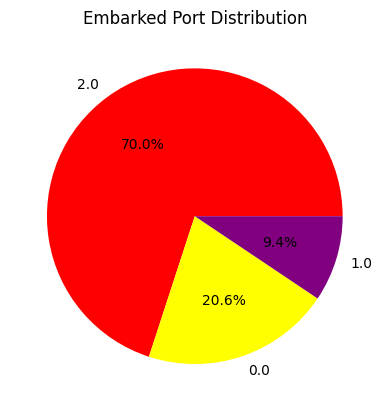

In [262]:
# Embarked Port Distribution (Embarked)
df["Embarked"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["red", "yellow", "purple"])
plt.title("Embarked Port Distribution")
plt.ylabel("")
plt.show()

## **Model Training & Evaluation**

In [263]:
# Train Test splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Training & Evaluation using Random Forest Classifier**

In [264]:
from sklearn.ensemble import RandomForestClassifier
# Initialize & Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [265]:
y_pred=rf_model.predict(X_test)

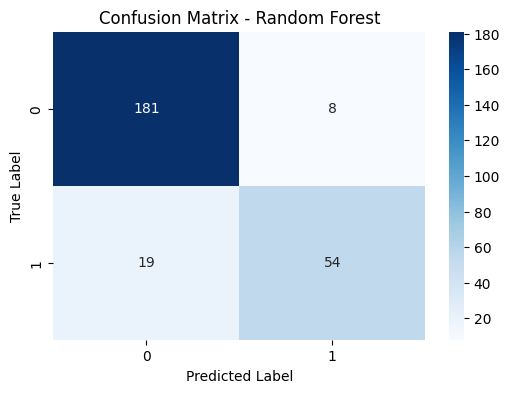

In [266]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [267]:
# Classification Report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       189
           1       0.87      0.74      0.80        73

    accuracy                           0.90       262
   macro avg       0.89      0.85      0.87       262
weighted avg       0.90      0.90      0.89       262



### Training Model & Evaluation using Logestic Regression

In [268]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter=1000)
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [269]:
# Prediction
y_pred=lr_model.predict(X_test)

In [270]:
# Evaluating Model Performance
accuracy=accuracy_score(y_test,y_pred)
print(f"model accuracy is {accuracy}")

model accuracy is 0.8244274809160306


In [271]:
print(f"classification_report is {classification_report(y_test,y_pred)}")

classification_report is               precision    recall  f1-score   support

           0       0.85      0.93      0.88       189
           1       0.75      0.56      0.64        73

    accuracy                           0.82       262
   macro avg       0.80      0.74      0.76       262
weighted avg       0.82      0.82      0.82       262



In [272]:
cm=confusion_matrix(y_test,y_pred)

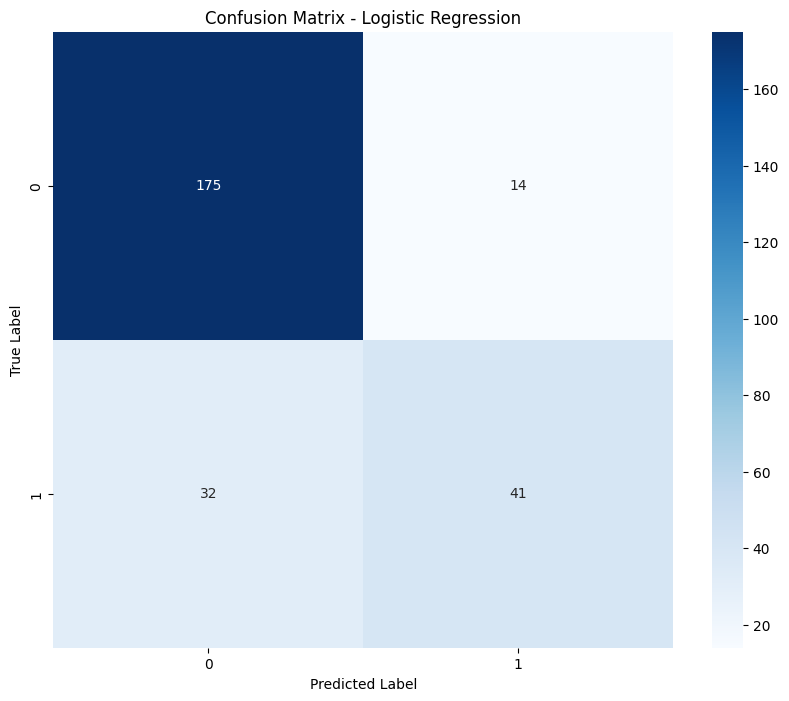

In [273]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### **Hyperparameter Tuning using GridSearchCV**

In [274]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [275]:
best_lr_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000)
best_lr_model.fit(X_train, y_train)

# Predictions
y_pred_best = best_lr_model.predict(X_test)


In [276]:
# Evaluate Model
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Optimized Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred_best))

Optimized Model Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       189
           1       0.82      0.55      0.66        73

    accuracy                           0.84       262
   macro avg       0.83      0.75      0.78       262
weighted avg       0.84      0.84      0.83       262



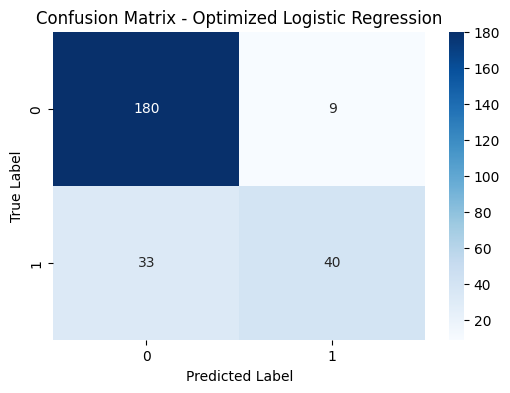

In [277]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Optimized Logistic Regression")
plt.show()

In [278]:
# Extracting values
TN, FP, FN, TP = cm.ravel()

# Printing the values
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

True Positives (TP): 40
False Positives (FP): 9
True Negatives (TN): 180
False Negatives (FN): 33


# Training & Evaluation Using SVM

In [279]:
from sklearn.svm import SVC
svm_model=SVC(kernel='rbf',C=1.0, gamma='scale')
svm_model.fit(X_train,y_train)

SVC()

In [280]:
y_pred=svm_model.predict(X_test)

In [281]:
accuracy=accuracy_score(y_test,y_pred)
print(f"model accuracy is {accuracy}")

model accuracy is 0.7213740458015268


In [282]:
classification_report(y_test,y_pred)
print(f"classification_report is {classification_report(y_test,y_pred)}")

classification_report is               precision    recall  f1-score   support

           0       0.72      1.00      0.84       189
           1       0.00      0.00      0.00        73

    accuracy                           0.72       262
   macro avg       0.36      0.50      0.42       262
weighted avg       0.52      0.72      0.60       262



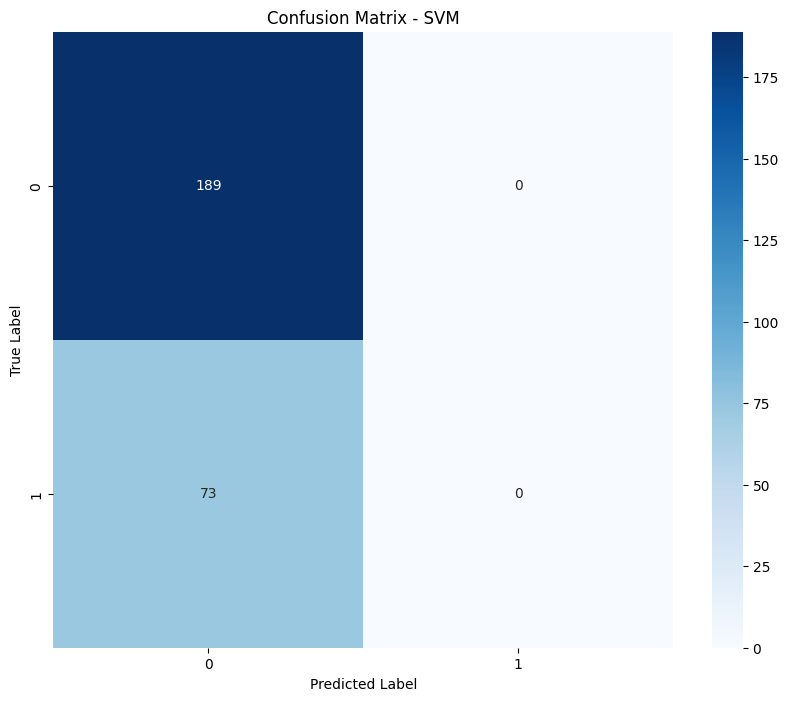

In [283]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.show()

In [284]:
# Extracting values
TN, FP, FN, TP = cm.ravel()

# Printing the values
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")

True Positives (TP): 0
False Positives (FP): 0
True Negatives (TN): 189
False Negatives (FN): 73


In [285]:
models = ['Random Forest', 'SVM', 'Logistic Regression']


accuracy = [0.83, 0.73, 0.84]
precision = [0.80, 0.52, 0.74]
recall = [0.83, 0.72, 0.75]
f1_score = [0.82, 0.60, 0.74]

# Setting positions for bars
x = np.arange(len(models))
width = 0.2

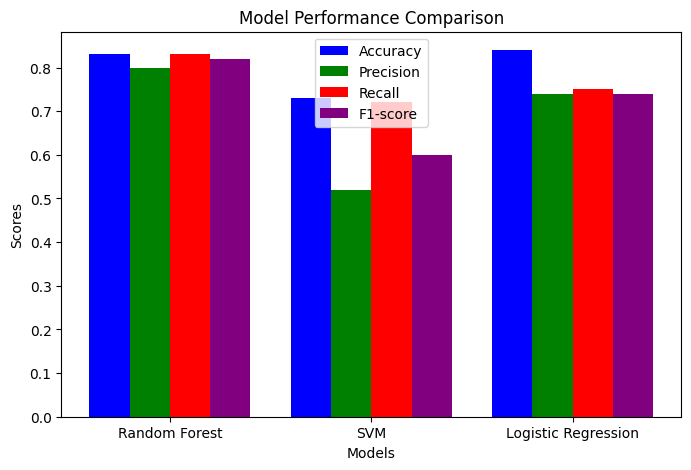

In [286]:
# Plotting bars
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width*1.5, accuracy, width, label='Accuracy', color='blue')
ax.bar(x - width/2, precision, width, label='Precision', color='green')
ax.bar(x + width/2, recall, width, label='Recall', color='red')
ax.bar(x + width*1.5, f1_score, width, label='F1-score', color='purple')

# Labels and Title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show plot
plt.show()